In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [114]:
print(f"there are rows {df.shape[0]} and {df.shape[1]} columns")

there are rows 1338 and 7 columns


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [116]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [117]:
df.duplicated().sum()

1

In [118]:
df.drop_duplicates(inplace=True)

In [119]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [120]:
for i in df.columns:
    print("\n----------"+i+"------------------\n")
    print("\n",df[i].value_counts())
    print("\n",df[i].describe(),"\n")


----------age------------------


 18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

 count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64 


----------sex------------------


 male      675
female    662
Name: sex, dtype: int64

 count     1337
unique       2
top       male
freq       675
Name: sex, dtype: object 


----------bmi------------------


 32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     

In [121]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [122]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [123]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

 # Visualiation📊

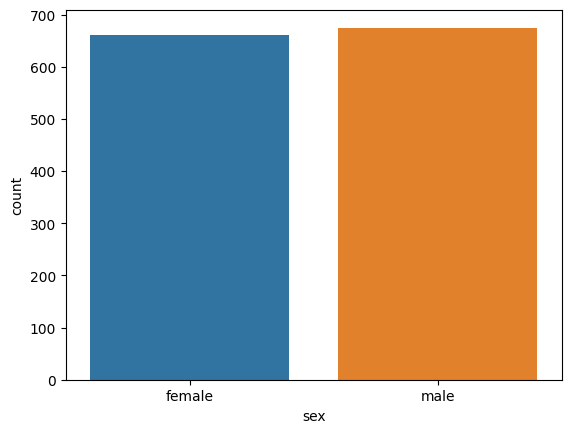

In [124]:
sns.countplot(x='sex',data=df);

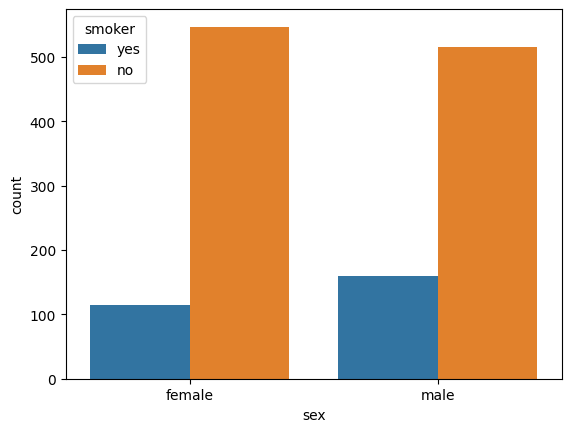

In [125]:
sns.countplot(x='sex',data=df,hue='smoker');

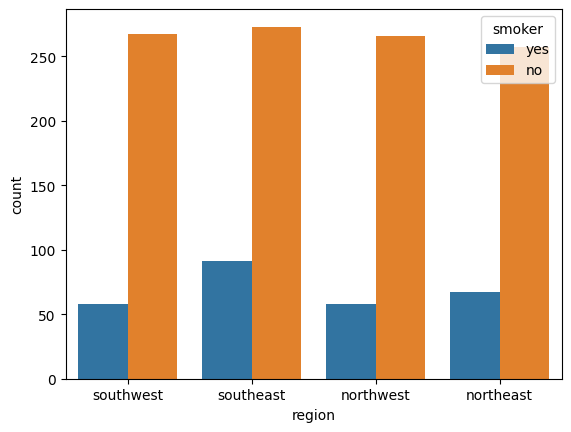

In [126]:
sns.countplot(x='region',data=df,hue='smoker');

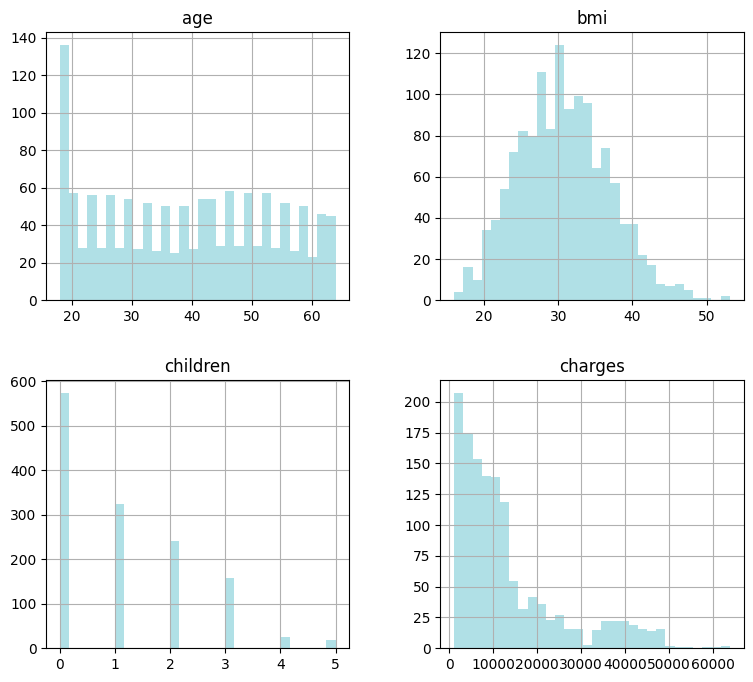

In [127]:
df.hist( figsize=(9, 8) ,bins = 30, color='#b0e0e6' ,alpha = 1)
plt.show()

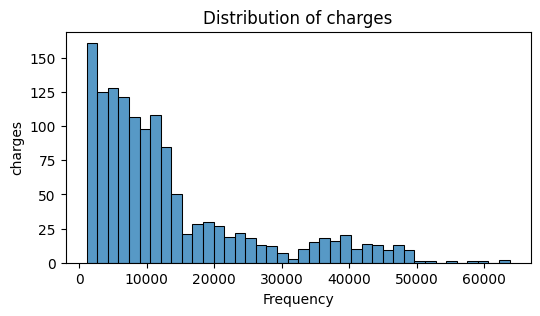

In [128]:
plt.figure(figsize=(6,3))
sns.histplot(df.charges,bins=40)
plt.xlabel("Frequency")
plt.ylabel("charges")
plt.title("Distribution of charges")
plt.show()


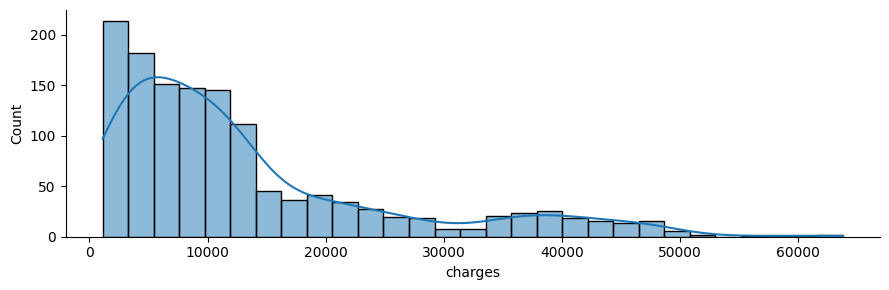

In [129]:
sns.displot(df['charges'],kde =True,height=3,aspect=3)
plt.show()

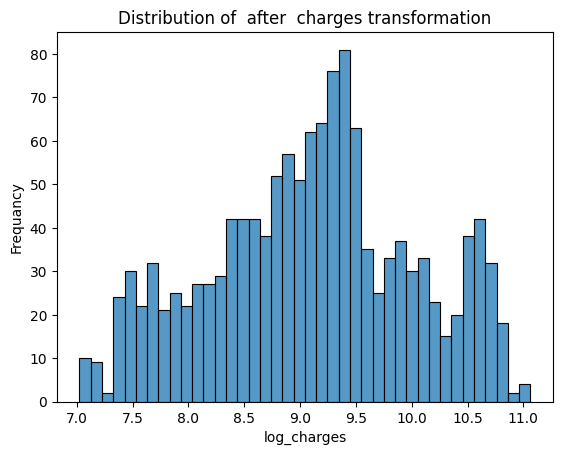

In [130]:
df['log_charges']=np.log1p(df.charges)
sns.histplot(df.log_charges,bins=40)
plt.xlabel("log_charges")
plt.ylabel("Frequancy")
plt.title("Distribution of  after  charges transformation")
plt.show()

In [131]:
df.charges.skew()

1.5153909108403483

In [132]:
df.log_charges.skew()

-0.08955835073325998

In [133]:
cor= df.select_dtypes(exclude=object).corr()
cor

,age,bmi,children,charges,log_charges
age,1.000000,0.109344,0.041536,0.298308,0.526900
bmi,0.109344,1.000000,0.012755,0.198401,0.132831
children,0.041536,0.012755,1.000000,0.067389,0.160316
charges,0.298308,0.198401,0.067389,1.000000,0.893116
log_charges,0.526900,0.132831,0.160316,0.893116,1.000000


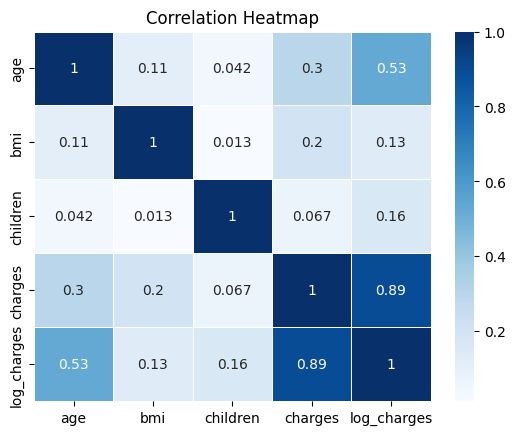

In [134]:
sns.heatmap(cor, annot= True, linewidths= 0.5,cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

**check outliers**

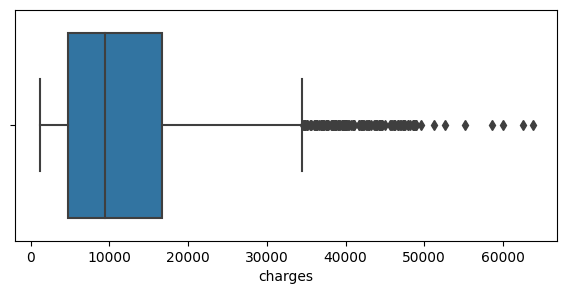

In [135]:
plt.figure(figsize=(7,3))
sns.boxplot(x='charges', data=df)
plt.show()


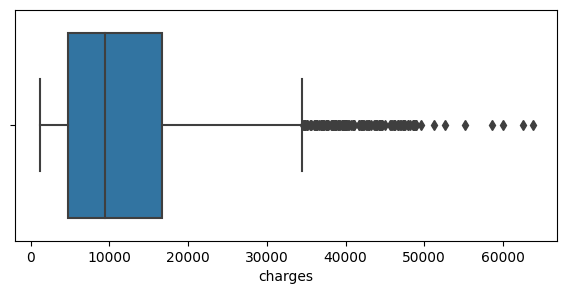

In [136]:
plt.figure(figsize=(7,3))
sns.boxplot(x='charges', data=df)
plt.show()


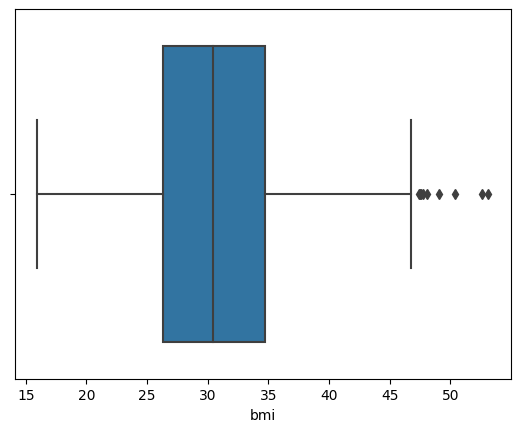

In [137]:
sns.boxplot(x='bmi', data=df);

**Outliers in bmi and charges**

In [138]:
# drop outlier points from 'bmi'.
df=df[df['bmi'] <= 46]

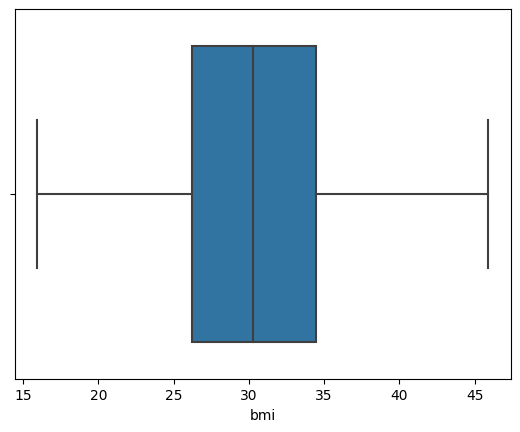

In [139]:
sns.boxplot(x='bmi', data=df);

In [140]:
# drop outlier points from 'charges'.
df=df[df['charges'] <= 21900]

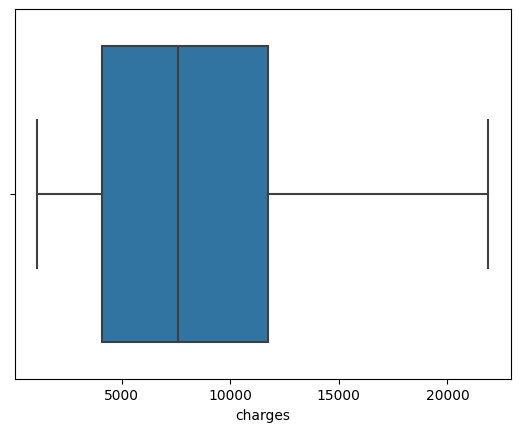

In [141]:
sns.boxplot(x='charges', data=df);

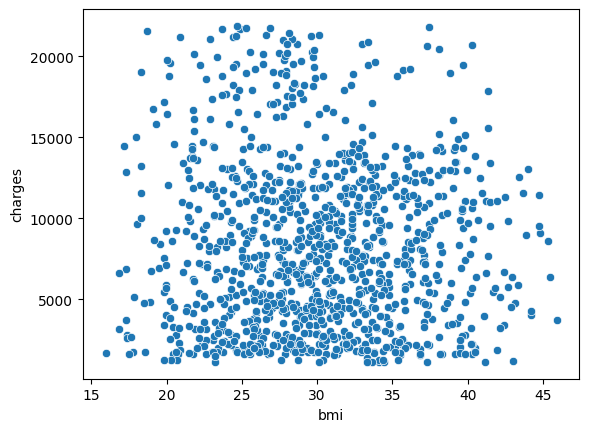

In [142]:
sns.scatterplot(data= df,x= 'bmi',y= 'charges')
plt.show()

another way for one hot encoding
#-----------------------------------
pd.dummies(df.["column_name"])

In [143]:
#encoding
from sklearn.preprocessing import OneHotEncoder

In [144]:
OHE = OneHotEncoder()

In [145]:
feature_array = OHE.fit_transform(df[["sex","smoker", "region"]]).toarray()

In [146]:
feature_labels=OHE.categories_   #the features in(sex,smoker,region)

In [147]:
feature_labels

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [148]:
feature_labels = np.concatenate(feature_labels)#to make them in one array

In [149]:
feature_labels=np.array(feature_labels)

In [150]:
feature_labels

array(['female', 'male', 'no', 'yes', 'northeast', 'northwest',
       'southeast', 'southwest'], dtype=object)

In [151]:
features=pd.DataFrame(feature_array,columns=feature_labels)

In [152]:
features

,female,male,no,yes,northeast,northwest,southeast,southwest
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1079,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1080,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1081,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1082,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [153]:
df = pd.concat([df.reset_index(drop=True), features.reset_index(drop=True)], axis=1)

In [154]:
df=df.drop("sex",axis=1)
df=df.drop("smoker",axis=1)
df=df.drop("region",axis=1)

In [155]:
df.head()

,age,bmi,children,charges,log_charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.90,0,16884.9240,9.734236,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.77,1,1725.5523,7.453882,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.00,3,4449.4620,8.400763,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,32,28.88,0,3866.8552,8.260455,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,31,25.74,0,3756.6216,8.231541,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [156]:
#scaling
from sklearn.preprocessing import StandardScaler

In [157]:
scaler=StandardScaler()

In [158]:
scaler_df=scaler.fit_transform(df)

In [159]:
df.head()

,age,bmi,children,charges,log_charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.90,0,16884.9240,9.734236,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.77,1,1725.5523,7.453882,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.00,3,4449.4620,8.400763,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,32,28.88,0,3866.8552,8.260455,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,31,25.74,0,3756.6216,8.231541,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [160]:
X = df.drop(columns=["charges"])
y = df['charges']

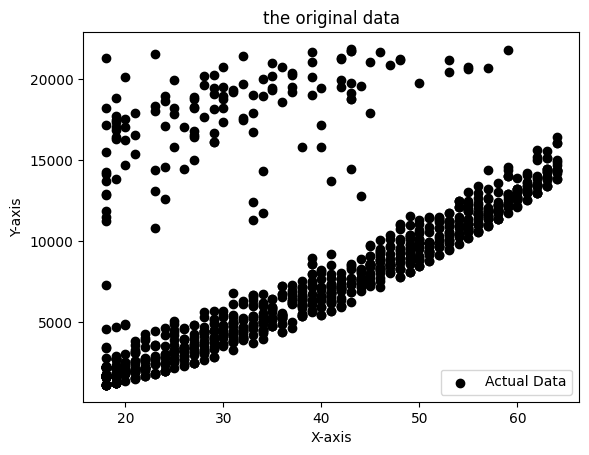

In [161]:
import matplotlib.pyplot as plt
# Visualize the data and the linear regression line
plt.scatter(X["age"], y, color='black', label='Actual Data')
# plt.plot(x_test, y_pred, color='blue', linewidth=3, label='Linear Regression Line')
plt.title('the original data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [162]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y , test_size= 0.70 , random_state=70)

In [163]:
x_train.head()

,age,bmi,children,log_charges,female,male,no,yes,northeast,northwest,southeast,southwest
585,18,40.280,0,7.704632,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
566,31,30.495,3,8.718374,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
144,58,28.595,0,9.370491,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
873,63,33.660,3,9.626583,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1060,32,28.120,4,9.974574,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [164]:
y_train.head()

585      2217.60120
566      6113.23105
144     11735.87905
873     15161.53440
1060    21472.47880
Name: charges, dtype: float64

In [165]:
# Create a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [166]:
# Train the model
model.fit(x_train,y_train) #train

LinearRegression()

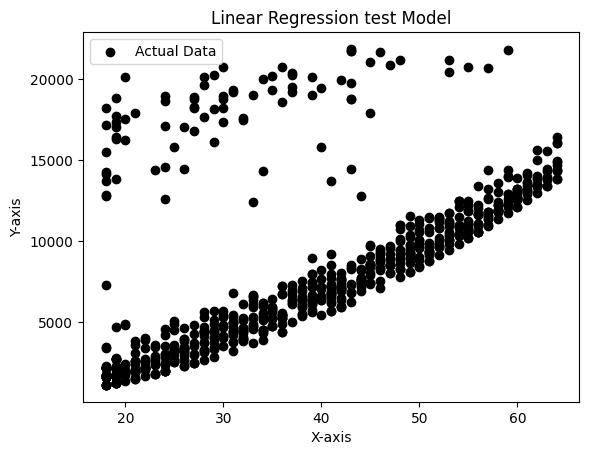

In [167]:
import matplotlib.pyplot as plt
# Visualize the data and the linear regression line
plt.scatter(x_test["age"], y_test, color='black', label='Actual Data')
# plt.plot(x_test, y_pred, color='blue', linewidth=3, label='Linear Regression Line')
plt.title('Linear Regression test Model')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

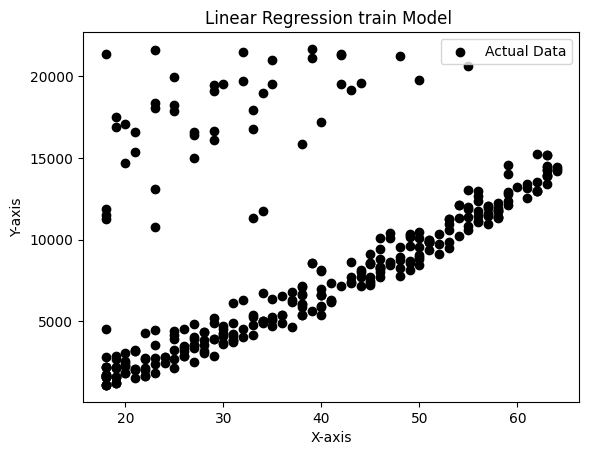

In [168]:
import matplotlib.pyplot as plt
# Visualize the data and the linear regression line
plt.scatter(x_train["age"], y_train, color='black', label='Actual Data')
# plt.plot(x_test, y_pred, color='blue', linewidth=3, label='Linear Regression Line')
plt.title('Linear Regression train Model ')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [169]:
model.coef_

array([  -38.49941364,    19.30285929,  -328.52762008,  6858.71366706,
        -247.60275335,   247.60275335, -1568.36696539,  1568.36696539,
          35.12474865,  -180.92069699,   194.01504171,   -48.21909337])

In [170]:
model.intercept_

-49431.98678481979

####y = intercept(b) + coef(m)*x


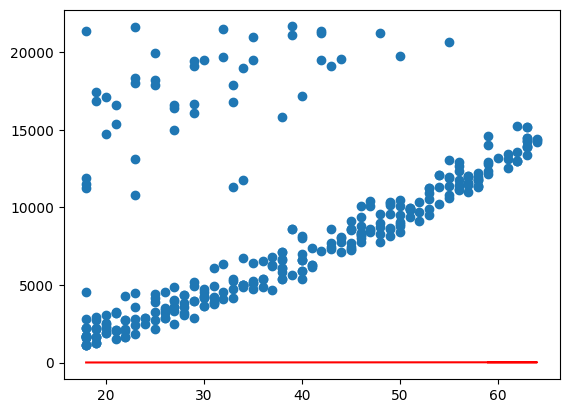

In [171]:
plt.scatter(x_train["age"], y_train)
plt.plot(x_train["age"], -0.02604727874226525 + 0.29071804*x_train["age"], 'r')
plt.show()

In [172]:
y_pred = model.predict(x_test) #testing

In [173]:
y_pred

array([ 1.94313814e+04, -6.85587253e+02,  2.68991159e+03,  3.82096342e+03,
        3.23962912e+03,  1.76416975e+03,  1.85623168e+03,  7.23908491e+03,
        1.17061831e+04,  1.04555463e+04,  1.06259169e+04,  8.24361969e+03,
        5.56883309e+03,  9.92604027e+03,  6.42657687e+03,  1.84902970e+03,
        2.28506940e+03, -4.81697256e+02,  6.66809845e+03,  2.55081993e+03,
        9.37957253e+03,  8.86573542e+03,  1.03393276e+04,  6.12461929e+03,
       -2.08224596e+03,  1.24309309e+04,  1.00154655e+04,  7.93483135e+03,
        6.36722405e+03,  3.94509955e+03,  2.20060337e+03,  1.70246955e+03,
        9.78303978e+03,  1.24034134e+04,  7.76705335e+03,  7.94318400e+03,
        1.25132934e+04,  8.37924559e+03,  4.98595142e+03, -5.31316300e+02,
        2.36451824e+03,  1.95165699e+04,  4.73241115e+03,  1.16950927e+04,
        7.34634243e+03,  4.16152258e+03,  9.00819740e+03,  9.48661476e+03,
        1.02602222e+04,  9.74201081e+03,  4.53836135e+03,  4.71038027e+03,
        9.93840573e+03,  

In [174]:
np.array(y_test)

array([20773.62775 ,  1515.3449  ,  2497.0383  ,  3070.8087  ,
        3021.80915 ,  2457.502   ,  2527.81865 ,  5584.3057  ,
       14001.2867  , 10355.641   , 11163.568   ,  6781.3542  ,
        3935.1799  ,  9225.2564  ,  5031.26955 ,  2352.96845 ,
        2322.6218  ,  1731.677   ,  5227.98875 ,  2534.39375 ,
        8062.764   ,  7441.053   ,  9290.1395  ,  5693.4305  ,
        1149.3959  , 12574.049   ,  8442.667   ,  5966.8874  ,
        4518.82625 ,  3292.52985 ,  2709.1119  ,  2304.0022  ,
       11015.1747  , 12950.0712  ,  7243.8136  ,  6748.5912  ,
       14043.4767  ,  7986.47525 ,  4149.736   ,  1728.897   ,
        2523.1695  , 18648.4217  ,  4005.4225  , 11576.13    ,
        6198.7518  ,  3554.203   ,  9101.798   ,  9182.17    ,
        9800.8882  ,  8871.1517  ,  3761.292   ,  3925.7582  ,
        8944.1151  , 13974.45555 ,  6112.35295 , 13405.3903  ,
       11085.5868  ,  7518.02535 , 17361.7661  ,  9877.6077  ,
        9377.9047  ,  5267.81815 , 14394.5579  ,  6653.

In [175]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

###MSE=1/n n∑i=1(yi−y^i)**2

In [176]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

1417.8062720250625

In [177]:
#accurcy
r_squared = r2_score(y_test, y_pred)
r_squared

0.9217652033377775

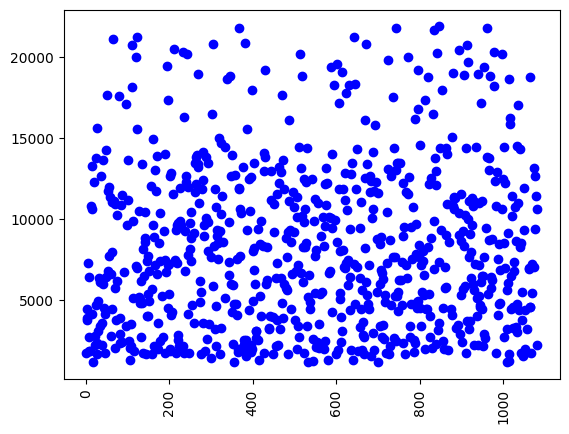

In [178]:
plt.plot(y_test,'bo')
plt.xticks(rotation=90)
plt.show()

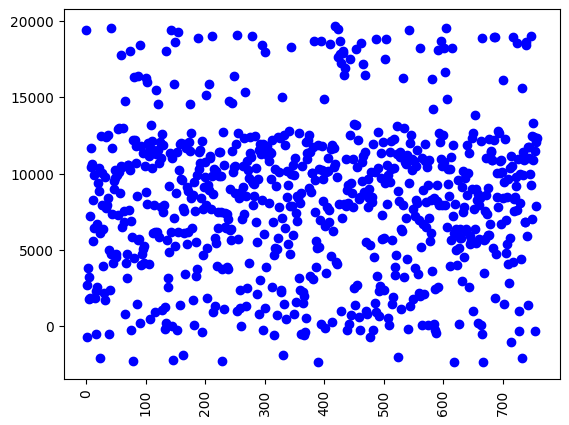

In [179]:
plt.plot(y_pred,'bo')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Predicted Values')

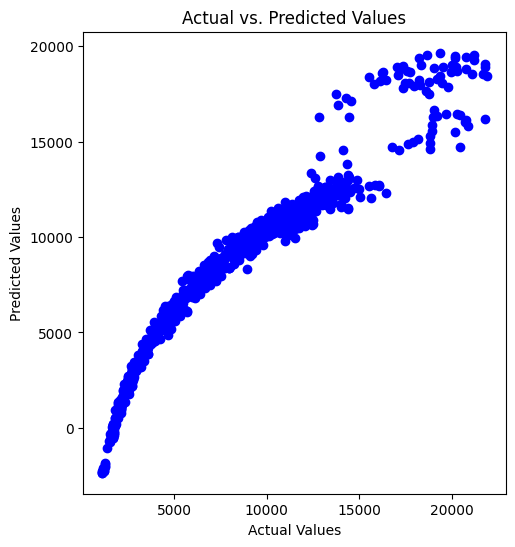

In [180]:
plt.figure(figsize=(12, 6))

# Scatter plot for actual vs. predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

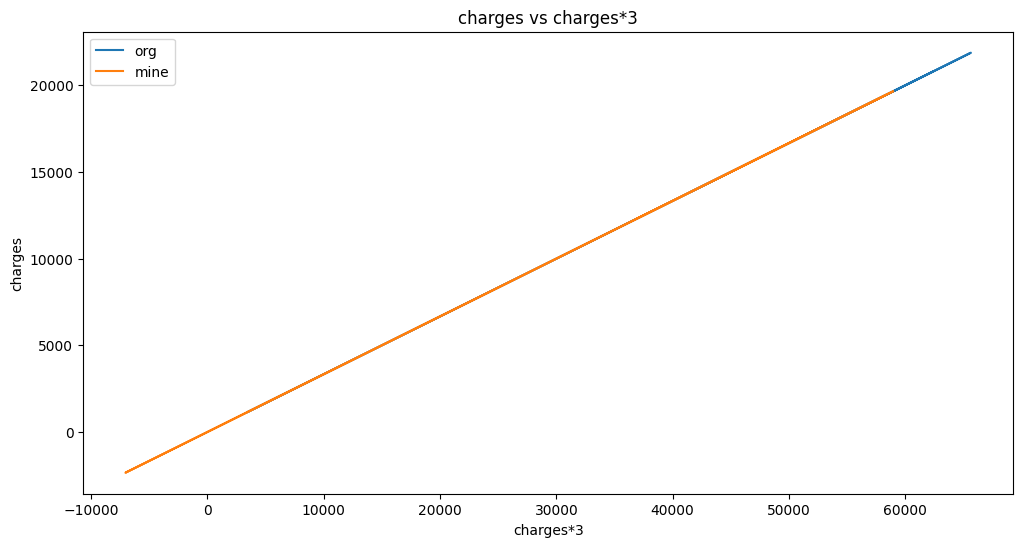

In [181]:
plt.figure(figsize=(12, 6))
plt.title('charges vs charges*3')
plt.xlabel('charges*3')
plt.ylabel('charges')
plt.plot(y_test*3,y_test,label='org')
# You can plot to plots using the same axes
plt.plot(y_pred*3,y_pred,label='mine')
plt.legend()

In [182]:
# الحمدلله الذى تتم بنعمته الصالحات